# Linear and Polynomial Regressions
By Sai Prajwal Kotamraju
## Linear Regression
First step is to import the required libraries- NumPy (For mathematical manipulations) and MatPlotLib for plotting.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

If the relation between independent and dependent variables is linear, i.e. if the dependent variable can be expressed closely as sum of weighted inputs (independent variables), Linear Regression is preferred. 
Let us look into a simple example.

In [2]:
X = 2* np.random.rand(100,1) # A vector of 100 random values between 0 and 2
X = np.sort(X, axis = 0) # Sorting the vector in ascending order
y = 3* X + 5 + np.random.randn(100,1) # Closely linear relationship betweehn DV and IV with some Gaussian noise

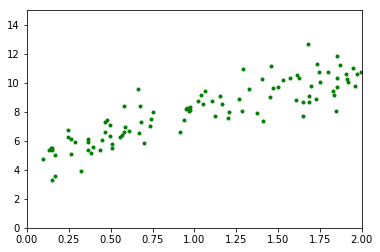

In [3]:
plt.plot(X,y,"g.") 
plt.axis([0, 2, 0, 15])
plt.show()

As we can see from the plot above, the values of y are increasing almost linearly with the X values. So, we can use Linear Regression to predict the dependent variable value for a new independent variable value.

Now, let us use Scikit-Learn to find the model parameters (In this case, slope and intercept values).

Note: For a model with N independent features, we will have N+1 model parameters --> N weights for N individual features plus one parameter for the intercept.

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Let us now see the values of intercept and the slope

In [5]:
lin_reg.intercept_ , lin_reg.coef_

(array([ 4.93460286]), array([[ 2.97457027]]))

As we can see, the slope obtained is very close to the defined slope = 3. And the intercept value by our model is also close to our defined intercept 5. (Since y = 3*X+5+noise). 

Now, let us see how our model predicts the values.

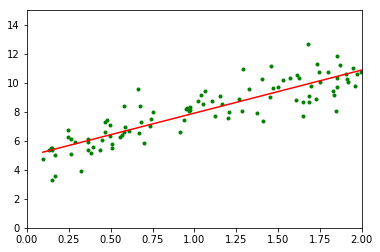

In [6]:
y_pred = lin_reg.predict(X)
plt.plot(X,y,'g.')
plt.plot(X,y_pred,'r-')
plt.axis([0, 2, 0, 15])
plt.show()

The red line in the above plot corresponds to the predicted values of our linear regression model with respect to the independent variable (feature) X. 

To predict the value for a new instance of feature X, all we need to do is this. (See below).

In [7]:
X_new = np.array([[0],[1],[2],[2.25],[2.6],[3]]) #Feature instances for which we want the predictions
y_pred_new = lin_reg.predict(X_new)
y_pred_new

array([[  4.93460286],
       [  7.90917313],
       [ 10.8837434 ],
       [ 11.62738597],
       [ 12.66848556],
       [ 13.85831367]])

This concludes the basics of a Linear Regression Model.

### Finding out the model parameters using Gradient Descent algorithms

#### Batch Gradient Descent: Involves calculations over the complete training set X at each step

In [8]:
X_app = np.c_[np.ones((100,1)),X] # Adding a column of ones to the X matrix on to the left.

lr = 0.1 # Learning Rate 
N = 1000 # Number of steps or iterations
m = 100 # Number of instances

params = np.random.randn(2,1) # Random initialization of parameters (slope and intercept)

for i in range(N):
    gradient = (2.00/m)*(X_app.T).dot(X_app.dot(params) - y) # Formula for calculating gradient vector
    # The above formula uses the complete training set. 
    # Hence, as size of x increases, computation time increases.
    params = params - lr*gradient #Updation of parameters based on gradient
    
params

array([[ 4.93460286],
       [ 2.97457027]])

We can see that the model parameters we ended up using the Gradient Descent are same as that of the ones from Normal Equation (In line 5).

#### Stochastic Gradient Descent: Picks random instance in training set at every step and computes gradients based on that single instance. 
This helps in reduced computational time when compared to batch gradient descent. But because of the stochastic nature of this algorithm, the final parameter values are good, but not optimal.

In [9]:
init_val = 10.00
N_of_epochs = 50

def lr_control(t):
    return 1/(t+init_val)

params_sgd = np.random.randn(2,1) # Random initialization of parameters (slope and intercept)

for i in range(N_of_epochs):
    for j in range(m):
        rand_index = np.random.randint(m)
        Xi = X_app[rand_index:rand_index+1]
        yi = y[rand_index:rand_index+1]
        gradient_sgd = 2.0 * Xi.T.dot(Xi.dot(params_sgd)-yi)
        variable_lr = lr_control(i*m+j)
        params_sgd = params_sgd - variable_lr*gradient_sgd #Updation of parameters
        
params_sgd

array([[ 4.71219324],
       [ 3.15264685]])

Now, let us plot the prediction curves of both batch gradient descent as well as stochastic gradient descent algorithms in a single plot and see how they differ.

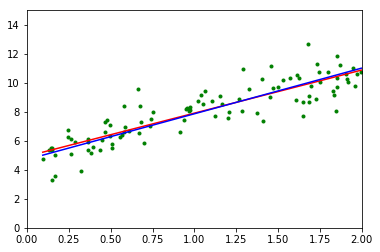

In [10]:
y_pred_sgd = X_app.dot(params_sgd)
plt.plot(X,y,'g.')
plt.plot(X,y_pred,'r-') # Batch Gradient Descent- red color
plt.plot(X,y_pred_sgd,'b-') # Stochastic Gradient Descent- blue color
plt.axis([0, 2, 0, 15])
plt.show()

We see that SGD algorithm does good in predicting the output. Although the parameters aren't optimal, it just took 50 epochs over the entire training set to reach a good solution when compared to batch gradient descent which took 1000 iterations over the whole training set. One more advantage of Stochastic Gradient Descent algorithm is that it may reach the global minima if the learning rate is high enough to escape the local minima. So, if the Cost Function isn't perfectly convex or if the size of dataset is high, Stochastic Gradient Descent is preferable over the batch gradient descent.

Stochastic Gradient Descent algorithm can also be implemented using Scikit-Learn as follows:

In [11]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter= 50, penalty= None, eta0 = 0.1) # eta0 is the learning rate lr
# When penalty is None, there is no regularization (discussed in further topics)
sgd_reg.fit(X,y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([ 4.95410929]), array([ 3.00903326]))

#### Mini-batch Gradient Descent: Computes the gradient on small random sets of instances called mini-batches. 
It is basically a compromise between batch gradient descent and stochastic gradient descent algorithms.

## Polynomial Regression

This is when our data gets more complicated than just a straight line. Trick here is to use the same linear model as above with extended set of features (adding powers of features as new fatures).

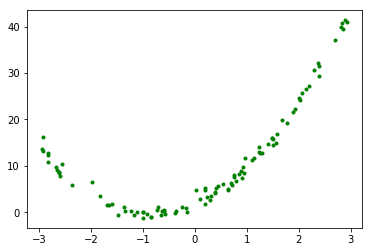

In [12]:
m = 100 # Number of samples
X_pol = 6* np.random.rand(m,1) - 3 # To have random x_pol values between -3 to +3
X_pol = np.sort(X_pol, axis = 0) # Sorting the column values in ascending order
y_pol = 3* X_pol**2 + 5* X_pol + 2 + np.random.randn(m,1) # Quadratic function in x_pol with some noise
plt.plot(X_pol,y_pol,"g.") 
plt.show()

It is clear from the above plot that a straight line will never serve as the best approximate for this data plot. We can use Scikit-Learn's PolynomialFeatures class to add the powers of each feature (In this case just one feature --> X_poly) as new features to our training data. 

In [13]:
from sklearn.preprocessing import PolynomialFeatures
ply_fea = PolynomialFeatures(degree=2, include_bias = False) # Polynomial Features with degree 2 (quadratic)
X_pol_updated = ply_fea.fit_transform(X_pol)

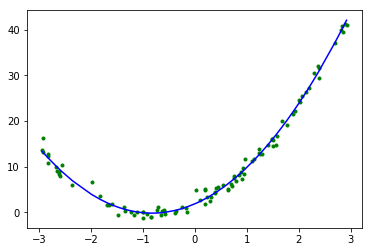

In [14]:
lin_reg = LinearRegression()
lin_reg.fit(X_pol_updated, y_pol)
y = lin_reg.predict(X_pol_updated)
plt.plot(X_pol,y_pol,"g.")
plt.plot(X_pol, y, "b-")
plt.show()

We see that the approximations/predictions by our model are pretty close to the original data points. So, this finishes the basic introduction to polynomial regression by using a simple linear model (with extended features). 